Project: Prediction mean values and exceeding limit days of fine Particulate Matter (PM2.5) in the air - Milan (Italy).

Student: **Alessandro Monolo** | 1790210

Lecturer: Jonas Moons

Fundamentals of Machine Learning - Master Data-Driven Design, Hogeschool Utrecht.

August 2021 - Block E

# Linear Regression model



### A Linear Regression model for predicting daily fine Particulate Matter (PM 2.5) concentration, in the city of Milan (Italy).

In [88]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [89]:
df_Milan = pd.read_csv('Milan_Final_Dataframe_2014_2019.csv')

In [90]:
#sns.pairplot(df_Milan)
#plt.show()

<Figure size 1224x432 with 0 Axes>

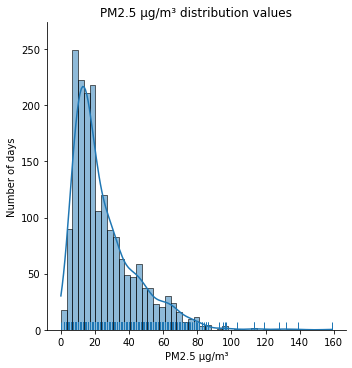

In [91]:
plt.figure(figsize=(17,6))
sns.displot(df_Milan['PM2.5 µg/m³'], kde=True, rug=True)
plt.title('PM2.5 µg/m³ distribution values')
plt.xlabel('PM2.5 µg/m³')
plt.ylabel('Number of days')
plt.show()

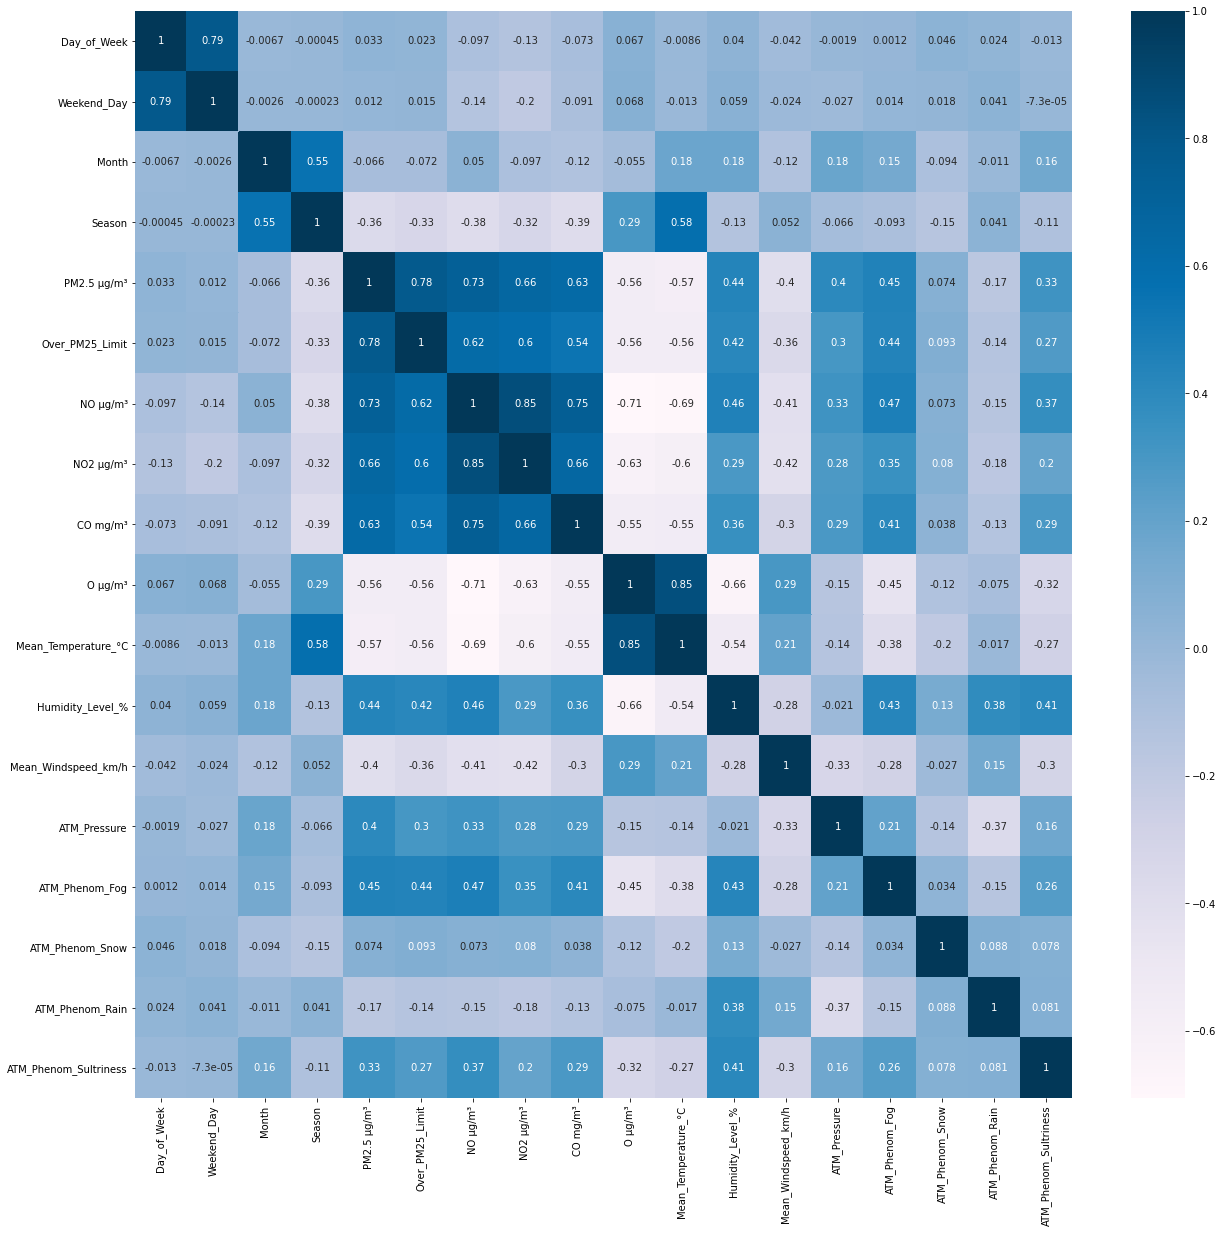

In [92]:
plt.figure(figsize=(21,20))
sns.heatmap(df_Milan.corr(), annot=True, cmap='PuBu')
plt.show()

In [93]:
df_Milan.columns

Index(['Day_of_Week', 'Weekend_Day', 'Month', 'Season', 'PM2.5 µg/m³',
       'Over_PM25_Limit', 'NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'O µg/m³',
       'Mean_Temperature_°C', 'Humidity_Level_%', 'Mean_Windspeed_km/h',
       'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Snow', 'ATM_Phenom_Rain',
       'ATM_Phenom_Sultriness'],
      dtype='object')

## Training a Linear Regression Model

The goal here is to predict the values of daily PM2.5 in the air.

In order to do that I need to create an new sub-dataset (X) using some of the numerical variables present into this final dataframe, which can have medium/high level of correlation related to the indipendent variable (PM2.5 µg/m³).

## Set the X dataframe used to train my Linear Regression Model

Here below I will set different X including by the times different indipendent variable combinations.
The choice made to select which kind of variables belong to the high correlations shown above.
Finally, in order to do not overfit the model I try different ones, comparing the best evaluation parameters as last.

In [94]:
X = df_Milan[['Day_of_Week', 'Weekend_Day', 'NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness']]

# The Mean Absolute Error : 8.48
# The Mean Squared Error is : 166.13
# The Root Mean Square Error is  : 12.89

In [95]:
# X = df_Milan[['Day_of_Week','NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness']]

#The Mean Absolute Error : 8.51
#The Mean Squared Error is : 167.16
#The Root Mean Square Error is  : 12.93

In [96]:
# X = df_Milan[['NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness']]

# The Mean Absolute Error : 8.58
# The Mean Squared Error is : 169.03
# The Root Mean Square Error is  : 13.00

In [97]:
# X = df_Milan[['NO µg/m³', 'NO2 µg/m³', 'CO mg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness', 'ATM_Phenom_Snow']]

# The Mean Absolute Error : 8.57
# The Mean Squared Error is : 169.09
# The Root Mean Square Error is  : 13.00

And Y as my prediction goal:

In [98]:
y = df_Milan['PM2.5 µg/m³']

In [99]:
from sklearn.model_selection import train_test_split

Test_size = % of data which are allocated as test size, therefore in this case will be the 40% of my dataset.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Next step is to import and train the model.

Thus, I need to grab from the sklearn.linear_model the model "LinearRegression".

In [101]:
from sklearn.linear_model import LinearRegression

Then I need to store into a variable my LinearRegression model.

In [102]:
lm = LinearRegression()

Here I fit the Ln Model with my new X dataframe.

In [103]:
lm.fit(X_train, y_train)

LinearRegression()

In [104]:
print(lm.intercept_)

-510.1924908745046


In [105]:
lm.coef_

array([0.71720661, 1.2968285 , 0.05254285, 0.28897692, 7.42742417,
       0.14565225, 0.48456997, 3.55534558, 4.65772609])

In [106]:
X_train.columns

Index(['Day_of_Week', 'Weekend_Day', 'NO µg/m³', 'NO2 µg/m³', 'CO mg/m³',
       'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog',
       'ATM_Phenom_Sultriness'],
      dtype='object')

## Prediction

Now I want to get the PM2.5 prediction values, using the model lm and with its function 'predict',
with the sub dataframe x_test.

In [107]:
predictions = lm.predict(X_test)

These above are the PM2.5 predictions, which are totally new inside our dataframe since we had them from our model.

In order to understand if my model worked well I will plot them using a scatterplot visualization and check
if my result follow a linear regression line (which should appear in case of a well done model).

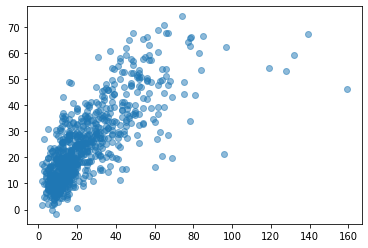

In [113]:
plt.scatter(y_test,predictions, alpha=0.5)

*Distribution of scatters appear following a linear regression line which identify a well done prediction*

## Plot the residuals distribution

Now I want to create a histogram of my residuals.
Residuals are the differences between the real PM2.5 and the predicted PM2.5 values.

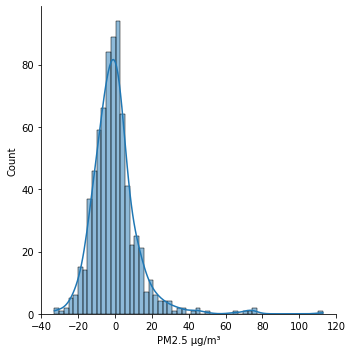

In [109]:
sns.displot((y_test-predictions), kde=True)
plt.show()

*The trend is modal therefore the residuals from the difference between actual values and predicted ones are equally distributed.*

## Regression Evaluation Metrics

Now to evaluate my Linear Regression model I need to import sci kit learn metrics, such as the absolute mean error, the Mean absolute error, the mean squared error and finally the root mean square error too.


Here are the three evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors (*the average error*):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors (*MSE "punishes" larger errors, which tends to be useful in the real world dataset like this one*):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors (*RMSE is interpretable in the "y" units*):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [110]:
MAE = metrics.mean_absolute_error(y_test, predictions)
print('The Mean Absolute Error :', MAE)

MSE = metrics.mean_squared_error(y_test, predictions)
print('The Mean Squared Error is :', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('The Root Mean Square Error is  :', RMSE)

The Mean Absolute Error : 8.486144003523298
The Mean Squared Error is : 166.13629454306064
The Root Mean Square Error is  : 12.889386895545522


### Coefficients

In [111]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
coeff_df

,Coeff
Day_of_Week,0.717207
Weekend_Day,1.296829
NO µg/m³,0.052543
NO2 µg/m³,0.288977
CO mg/m³,7.427424
Humidity_Level_%,0.145652
ATM_Pressure,0.484570
ATM_Phenom_Fog,3.555346
ATM_Phenom_Sultriness,4.657726


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Day_of_Week** is associated with an increase of µg/m³ 0.71.


- Holding all other features fixed, a 1 unit increase in **Weekend_Day** is associated with an increase of µg/m³ 1.29.


- Holding all other features fixed, a 1 unit increase in **NO µg/m³** is associated with an increase of µg/m³ 0.05.


- Holding all other features fixed, a 1 unit increase in **NO2 µg/m³** is associated with an increase of µg/m³ 0.29 .


- Holding all other features fixed, a 1 unit increase in **CO mg/m³** is associated with an increase of µg/m³ 7.42.


- Holding all other features fixed, a 1 unit increase in **Humidity_Level_%** is associated with an increase of µg/m³ 0.14.


- Holding all other features fixed, a 1 unit increase in **ATM_Pressure** is associated with an increase of µg/m³ 0.48.


- Holding all other features fixed, a 1 unit increase in **ATM_Phenom_Fog** is associated with an increase of µg/m³ 3.55.


- Holding all other features fixed, a 1 unit increase in **ATM_Phenom_Sultriness** is associated with an increase of µg/m³ 4.66.


Therefore the most important parameters in this case are the concentration of CO during the day and the atmospheric phenomenon which charaterize days during the year, such as snow, fog and sultriness.